https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

Eventually want a box plot by month, and graphs organized by Zone to determine which gentrifies.

Need to show total amount of sales per year [x]

Need an area chart comparing sales of multifamily.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')
import matplotlib.dates as mdates

In [6]:
%run jsoncleaner.py

In [9]:
#DO NOT RUN THIS TWICE IT CONTAINS A MERGE
df=df[df['Multiple Parcels Involved in Sale'] == 'No']
#Want to create a new column which is the mean sale price per square foot of a parcel in that neighborhood
df['PPS']=df['Sale Price']/df['Square Footage Improved']
df.PPS=df.PPS.replace(np.inf, np.nan)
meanpps=df.groupby('Neighborhood')['PPS'].mean().to_frame().rename(columns={'PPS':'NeighborhoodPPS'})
df=df.merge(meanpps, how='left', left_on = 'Neighborhood',right_index=True)

# Indexing by date.
df = df.set_index('Most Recent Sale Date')

#Creating some useful time variables
start, end = '2015-01-01', '2019-06'
year = df['Sale Date'].dt.year
month = df['Sale Date'].dt.month
weeklymean = df['Sale Price'].resample('W').mean()
monthlymean = df['Sale Price'].resample('M').mean()
yearlymean= df['Sale Price'].resample('Y').mean()
time = pd.date_range(start="2015-01-01", periods=42, freq="M")

C:\Users\alehe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\alehe\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
yearlymean

Most Recent Sale Date
1997-12-31    171900.000000
1998-12-31    121500.000000
1999-12-31    352000.000000
2000-12-31              NaN
2001-12-31              NaN
2002-12-31              NaN
2003-12-31    117900.000000
2004-12-31              NaN
2005-12-31              NaN
2006-12-31              NaN
2007-12-31     50000.000000
2008-12-31              NaN
2009-12-31    220000.000000
2010-12-31              NaN
2011-12-31              NaN
2012-12-31    260000.000000
2013-12-31              NaN
2014-12-31    827500.000000
2015-12-31    272373.790631
2016-12-31    287352.064303
2017-12-31    311847.105046
2018-12-31    327293.018955
2019-12-31    313804.377333
Freq: A-DEC, Name: Sale Price, dtype: float64

In [ ]:
time = pd.date_range(start="2015-01-01", periods=42, freq="M")
idf = pd.DataFrame(df[['Sale Price', 'Sale Date', 'Zone']])
monthly = idf.resample('M').mean()
monthly.head()

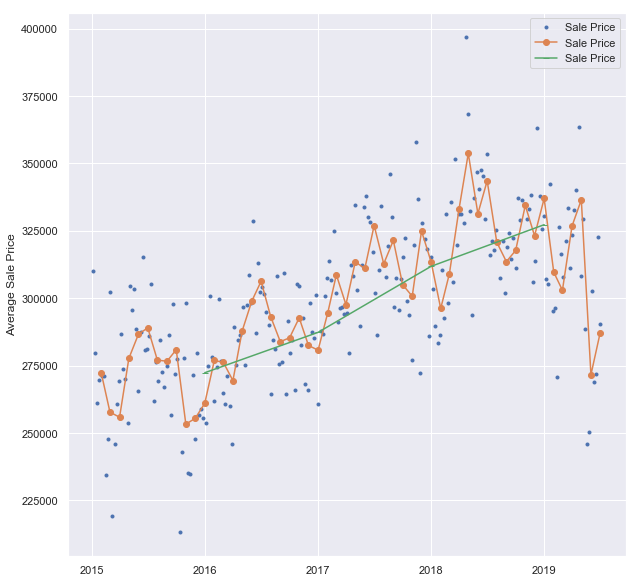

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(weeklymean.loc[start:end],marker='.',linestyle='None')
ax.plot(monthlymean.loc[start:end], marker='o')
ax.plot(yearlymean.loc[start:end], marker='_')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Average Sale Price');
#Notice the uptick during summer

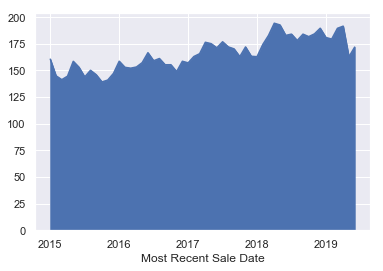

In [12]:
monthlypps= df['PPS'].resample('M').mean()

monthlypps.loc[start:end].plot.area()

In [ ]:
#Want a stacked/area graph of sales by Zone and by Housing Type
#sns.lineplot(x=month, y = monthlypps, hue = 'Zone', data = df)

In [15]:
monthlypps = df.PPS.resample('M').mean()
yearlypps=df.PPS.resample('Y').mean()
monthlypps.loc[start:end].head()

Most Recent Sale Date
2015-01-31    160.609451
2015-02-28    144.987879
2015-03-31    141.378106
2015-04-30    144.643852
2015-05-31    158.591463
Freq: M, Name: PPS, dtype: float64

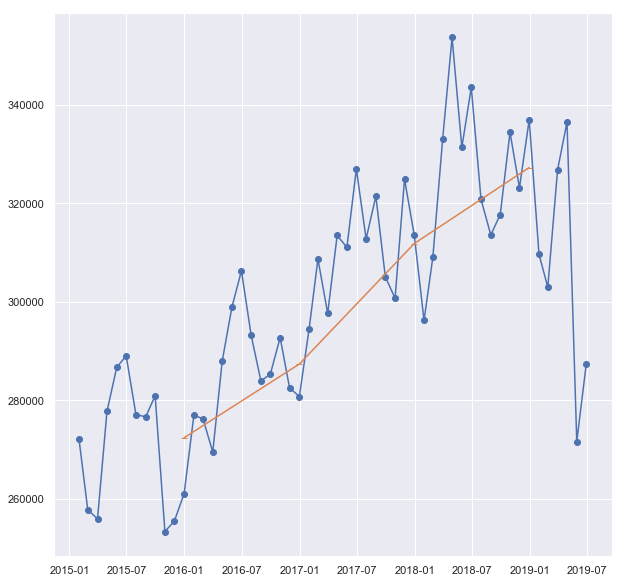

In [16]:

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(monthlymean.loc[start:end], marker='o')
ax.plot(yearlymean.loc[start:end], marker='_')

In [18]:
#sns.lineplot(x=df['Sale Date'].dt.month, y = df['PPS'].mean(), data=df.resample('M'))

C:\Users\alehe\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


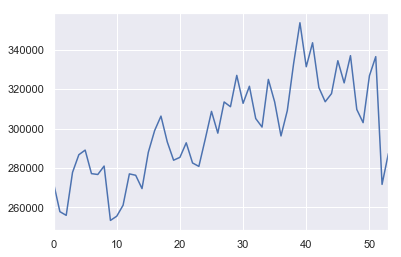

In [44]:
sns.tsplot(df['Sale Price'].loc[start:end].resample('M').mean(),err_style="ci_bars", interpolate=True)

C:\Users\alehe\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


TypeError: invalid type comparison

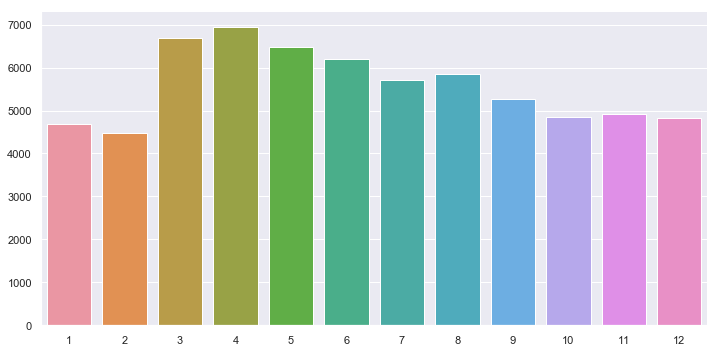

In [26]:
#Amount of sales by month.
g = sns.factorplot(month, data=df, aspect=2, kind="count")

C:\Users\alehe\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


TypeError: invalid type comparison

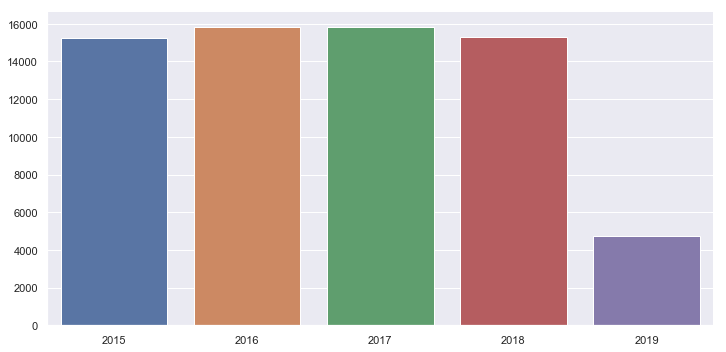

In [28]:
g = sns.factorplot(year, data=df, aspect=2, kind="count")

In [40]:
sns.lmplot(index,'Sale Price', df)

NameError: name 'index' is not defined

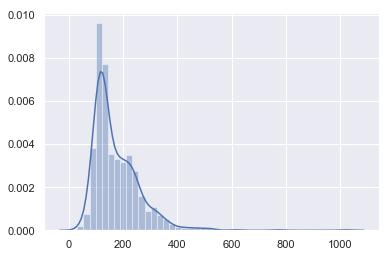

In [41]:
sns.distplot(meanpps.dropna())

In [49]:
data=sns.load_dataset("fmri")

data.columns

Index(['subject', 'timepoint', 'event', 'region', 'signal'], dtype='object')

In [57]:
type(ts.index)


NameError: name 'ts' is not defined

In [54]:
#sns.lmplot(x=month, y ='Sale Price', data=df)

df['Sale Price'].dtype

dtype('int64')